# Natural Language Toolkit (NLTK)

* [NLTK Documentation](https://www.nltk.org/#)<br/>
* [Natural Language Processing with Python (The NLTK book)](https://www.nltk.org/book/)<br/>
* [Project Gutenberg](https://www.gutenberg.org/)<br/>
* [Regular Expressions Operations in Python](https://docs.python.org/3/library/re.html)
* [Regular Expressions Tutorial at Regexone.com](https://regexone.com/)
* [Link to list of Part Of Speech (POS) tags](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html)

<blockquote>
<p>NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.</p>

<p>Thanks to a hands-on guide introducing programming fundamentals alongside topics in computational linguistics, plus comprehensive API documentation, NLTK is suitable for linguists, engineers, students, educators, researchers, and industry users alike. NLTK is available for Windows, Mac OS X, and Linux. Best of all, NLTK is a free, open source, community-driven project.</p>
<footer style="text-align:right;">Natural Language Toolkit — NLTK 3.3 documentation, NLTK Project, accessed 2018/10/01, https://www.nltk.org/# </footer>
</blockquote>
<p>

If you installed Anaconda you will have most of the NLTK resources but may still need to download some. The code below will bring you to the python downloader. From here you can download NLTK resources.

In [3]:
# to download NLTK resources
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [ ]:
# If you know precisely what resource you need you can also directly download it.
# Access the resource in the download function by using the resources name.
nltk.download('book')

## Tokenization
Tokenization in NLTK is the process of taking a string and breaking it into smaller meaningful pieces (e.g. words, or sentences). Very generally this works by seperating words into text. 

Python has it's own built in function for doing this, the `split` function.

In [ ]:
# we will take the sentence below and split it into a string of words.
# we will use whitespace to indicate the break points.
text = "I went to Bymarka and hiked all the way to the top.  The weather wasn't great."

print(text.split(' '))

In [ ]:
#If we want to save this we can store it in a variable
tokens = text.split(' ')
print(tokens)

However, notice we have a blank space in the text in between the sentences. It looks like there may have been a style to use two white space characters between sentences. To make our split a little smarter we can use regular expressions in python if we import the regular expressions module.<br/>
* [Regular Expressions Operations in Python](https://docs.python.org/3/library/re.html)
* [Regular Expressions Tutorial at Regexone.com](https://regexone.com/)

In [ ]:
import re
tokens = re.split('\s+',text)
print(tokens)


We could refine our regular expression even further but NLTK gives us a much simpler way to tokenize a string of text. NLTK has its own tokenizing functions for words and sentences.

In [4]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [ ]:
# This wil return a list of the sentences in our string. 
sent_tokens = sent_tokenize(text)
print(sent_tokens)

In [ ]:
# This will return a list of tokens as words
sent_words = word_tokenize(text)
sent_words

Now we have all the words, and the punctuation and the extra space has been removed. However we have some trouble with the contraction "wasn't". Let's look at some other ways to tokenize this and see if we can get fine tune this.

In [ ]:
# remember to get more information on how these work you can use the jupyter notebooks `?` for help
nltk.tokenize?

### Tokenizers
NLTK has several tokenizers that work in different ways. 
* **WhiteSpaceTokenizer** will simply tokenize based on white space. This is very much like the split function we used earlier.
* **PunktSentTokenizer** based on Tibor Kiss and Jan Stunk's work on boundar detection. This tokenizer splits on punctuation and does not separate it from the word. 
* **WordPunctTokenizer** will split all puntuation into its own token.
* ***TreebankWordTokenizer*** uses the [Penn Tree bank corpus](https://link.springer.com/chapter/10.1007/978-94-010-0201-1_1) to determine where to break up the string.
* **RegexpTokenizer** will work with a regular expression pattern you create. This is useful if you need to create a highly idiomatic tokenizer. The advantage is it can be tailored to the content however you should be confident in you understanding of regular expressions to identify patterns. [Regex Cheetsheet](https://www.rexegg.com/regex-quickstart.html)

In [ ]:
from nltk.tokenize import WhitespaceTokenizer
from nltk.tokenize import PunktSentenceTokenizer
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import TreebankWordTokenizer

In [ ]:
tokenizer = WhitespaceTokenizer()

tokenizer.tokenize(text)

In [ ]:
tokenizer = PunktSentenceTokenizer()

tokenizer.tokenize(text)

In [ ]:
# If we look at the documentaiton we see this is the same thing as using sent_tokenize
nltk.tokenize.sent_tokenize?

In [ ]:
tokenizer = WordPunctTokenizer()

tokenizer.tokenize(text)

In [ ]:
tokenizer = TreebankWordTokenizer()
tokenizer.tokenize(text)

None of the standard tokenizers treated the contraction quite how we would like to see it. Perhaps we need to use the Regular Expression tokenizer to deal with this special case. Regular Expressions can be tricky so it is important to understand how these work when applying them to your text.

In [ ]:
# This is a standard expression for splitting a string into word tokens.
tokenizer = RegexpTokenizer("[A-Za-z,']+|[^\w\s]")
word_tokens = tokenizer.tokenize(text)
print(word_tokens)

## Stop Words
Stop words are words that do not add any meaning to the text. And we will see later that they can often introduce "noise" into the analysis of a text or corpus. A common practice in Natural Language Processing is to remove stop words from a text. The intest to doin gthis is that only words that can provide useful insight into the text will remain. Stop words are words like "the", "a", "it". NLTK gives us an easy way to remove stop words form a text by using a corpus called `stopwords`. NLTK provides stopwords in many languages. 

In [ ]:
from nltk.corpus import stopwords
stopwords.words('arabic')

In [ ]:
# For our text we will want to use enlgish. We could use them all by not passing in a language, i.e. `stopwords.words()`
# To see the languages available we examine the file ids.
stopwords.fileids()

In [ ]:
stopwords_eng = stopwords.words('english')

In order to remove stop words from a text we need to create a "list comprehension". A list comprehension is just a simple way to create a list using an expression.

In [ ]:
# we have our text tokenized in `word_tokens`
[word for word in word_tokens if word not in stopwords_eng]

Notice that we kept the word "The". The capitalization is a factor in determining stop words. Let's adjust the comprehension to take this into account.

In [ ]:
[word for word in word_tokens if word.lower() not in stopwords_eng]

Now we can see all of the stop words have been remove, regardless of capitalization. Let's put this list into a new variable. 

In [ ]:
data = [word for word in word_tokens if word.lower() not in stopwords_eng]
data

## Lemma and Stemming
Stemming is essentially a crude version of lemmatization. Both are attempts at unifying variations of one word to a single source. In NLTK stemming uses an algorithm to basically cut off the tail end of a word. Stemming will turn "cats" into "cat" so that all the instances of the word "cat" can be identified.

Lemmatization however relies on more semantic methods to derive the lemma of a word using WordNet corpus as a lexical resource. The lemma is akin to what you would find in a dictionary. The lemma for "wolves" would be "wolf".

We will look more closely at WordNet later. For the moment lets see how these two different means of reduction affect the text.


### Stemming
NLTK provides several different stemmer algorithms.
* **PorterStemmer** relies on the [Porter Stemming algorithm](https://tartarus.org/martin/PorterStemmer/) developed by Martin Porter.
* **LancasterStemmer**  A word stemmer based on the Lancaster(Paice/Husk) stemming algorithm.
* **SnowballStemmer** An algorithm based on the [Snowball stemming algorithm](http://snowballstem.org/) also developed by Martin Porter.

You can see a [complete list of the different stemmers available in the nltk.stem API on nltk.org's documentation](https://www.nltk.org/api/nltk.stem.html?highlight=lancaster%20stemmer#nltk.stem.lancaster.LancasterStemmer)

In [ ]:
from nltk.stem import PorterStemmer
porter_stemmer = PorterStemmer()
porter_stemmer.stem('knives')

In [ ]:
from nltk.stem import LancasterStemmer
lancaster_stemmer = LancasterStemmer()
lancaster_stemmer.stem('knives')

In [ ]:
from nltk.stem import SnowballStemmer
snowball_stemmer = SnowballStemmer('english')
snowball_stemmer.stem('Knives')

### Lemmatization

NLTK relies on the WordNet corpus to identify the lemma of a word. The WordNet Corpus is a lexical resource that has tagged and correlated speech with a great degree of granularity. We will look further into it in a bit.


In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize('knives')

For fun let's right a function that will quickly show us all of the different ways these stemmers/lemmatizers will  treat a word.

In [ ]:
def stem_compare(word):
    print('Lemma:          ',lemmatizer.lemmatize(word) )
    print('Porter Stem:    ', porter_stemmer.stem(word))
    print('Lancaster Stem: ', lancaster_stemmer.stem(word))
    print('Snowball Stem:  ', snowball_stemmer.stem(word))
    print('\n')
    

In [ ]:
stem_compare('mystery')

In [ ]:
# we can even use this on our list of data.
t = [stem_compare(w) for w in data]

## Collocation

Collocations are words which commonly occur together in a text or corpus. For the moment we will look specifically at Bigrams and Trigrams, although there is no limit to the number of words that Python could evaluate for the likelihood of collocation. 

### bigrams and trigrams

To find bigrams in a text that frequently appear together we can use the BigramCollocationFinder. This will help to identify word pairs like "hot dog", "hanky panky", "a lot", "no one". A trigram is the same thing but instead of finding two words that frewuently appear together it locates <br/>
For this we will need a larger text. NLTK has these available to us in its corpus module. We will look at this is greater detail later. For the moment, we will use it to import the text of Lewis Carrol's Alice in Wonderland from [Project Guteneberg](https://www.gutenberg.org/)

In [ ]:
from nltk.corpus import gutenberg as gt

In [ ]:
gt.fileids()

In [ ]:
wonderland = gt.raw('carroll-alice.txt')


In [ ]:
print(wonderland)

In [ ]:
alice_words = tokenizer.tokenize(wonderland)

In [ ]:
alice_words

In [ ]:
# add punctuation to the stoplist words
import string
punct = string.punctuation
punct = [l for l in punct]
stopwords_eng = stopwords_eng + punct

In [ ]:
stopwords_eng

In [ ]:
core_alice = [word for word in alice_words if word.lower() not in stopwords_eng]

In [ ]:
print(core_alice)

#### bigrams

In [ ]:
from nltk.collocations import BigramCollocationFinder 
from nltk.metrics import BigramAssocMeasures 

In [ ]:
bigrams = BigramCollocationFinder.from_words(core_alice, window_size=2) 
bigrams.nbest(BigramAssocMeasures.likelihood_ratio, 20)

In [ ]:
# look a the score for a given bigram
bigrams.score_ngram(BigramAssocMeasures.likelihood_ratio, 'Mock','Turtle')

<p>Looks like we might need to work on the tokenization. The punctuation is throwingthins off a bit. Perhaps we want to try another tokenizer. One feature of the corpus reader is that it has already tokenized the text. Here we used the raw version but we can import the corpus' tokenized version of the file with `gt.words('carroll-alice.txt')`</p>
<p>Try using that version of the file and see what results you get.</p>

In [ ]:
wonderland = gt.words('carroll-alice.txt')

#### Trigrams
Trigrams are executed almost exactly the same way

In [ ]:
from nltk.collocations import TrigramCollocationFinder 
from nltk.metrics import TrigramAssocMeasures 
trigrams = TrigramCollocationFinder.from_words(core_alice,window_size=6)
trigrams.nbest(TrigramAssocMeasures.likelihood_ratio,20)

In [ ]:
# and again we can see the score for a trigram:
trigrams.score_ngram(TrigramAssocMeasures.likelihood_ratio, 'said','Mock','Turtle')

In [ ]:
trigrams.score_ngram(TrigramAssocMeasures.likelihood_ratio, 'Gryphon','Mock','Turtle')

## Parts of Speech Tagging (POS)
Tagging is a way of identifying certain properties of words, or tokens, in NLTK. For example, we could identify verbs and nouns in a text by tagging them with a string that indicates this semantic meaning. Identifying the proper parts of speech is complicated in a text, particularly if there are many unknown, or new uses of words, or the text is highly idiosyncratic (like Twitter messages). However, NLTK does include a recommender speech tagger. 

* [Link to list of Part Of Speech (POS) tags](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html)

Let's get sme new text to work with.

In [50]:
text = 'Derek is wors at Harvard Business Publishing and walked around Paris for five days.'
print(text)

Derek is wors at Harvard Business Publishing and walked around Paris for five days.


In order for the tagger to work we must tokenize the sentence into individual words. Let's use the nltk tokenizer and keep our lives simple for the moment.


In [51]:
token_text = word_tokenize(text)
token_text

['Derek',
 'is',
 'wors',
 'at',
 'Harvard',
 'Business',
 'Publishing',
 'and',
 'walked',
 'around',
 'Paris',
 'for',
 'five',
 'days',
 '.']

In [52]:
from nltk import pos_tag
pos = pos_tag
pos_text = pos(token_text)
print(pos_text)
# Note that the word, POS tag pairs are in parentheses "()", denoting these are tuples.

[('Derek', 'NNP'), ('is', 'VBZ'), ('wors', 'NNS'), ('at', 'IN'), ('Harvard', 'NNP'), ('Business', 'NNP'), ('Publishing', 'NNP'), ('and', 'CC'), ('walked', 'VBD'), ('around', 'IN'), ('Paris', 'NNP'), ('for', 'IN'), ('five', 'CD'), ('days', 'NNS'), ('.', '.')]



|POS Tag|Description|
|---|-----------|
|NNP|Proper Noun Singular |
|NNS| Noun Plural
|CC | Coordinating Conjunction |
|CD | Cardinal Number |
|IN| Preposition, or subordinating conjunction |
|VBD| Verb Past Tense  |
|RP | Particle |
|.  | Punctuation |
 

## Named Entity Recognition

NLTK also has the ability to recognize names in a text using a "chunker" to identify a list of tagged tokens. 

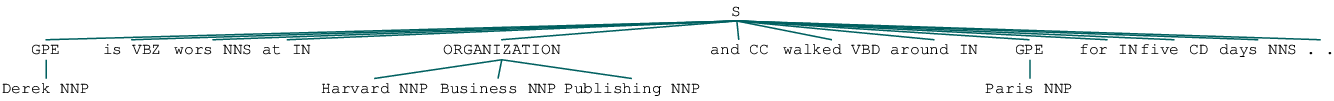

In [53]:
# note when running the name entity recognition you may need to down load "ghostscript" 
# Mac users can use 'brew install ghostscript'. For others a Google search should do the trick.  
# this script is used to draw a tree of the named entities
from nltk import ne_chunk
names = ne_chunk(pos_text)
names

In [60]:
#Export this graphic
# using the draw function will create an external tree that you can save as a postscript file.
nltk.ne_chunk(pos_text).draw()